In [3]:
# advance neuro project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
def ReLU(x):
    zeros_mat = np.zeros(x.shape)
    output = np.fmax(x,zeros_mat)
    return output

In [3]:
def ReLU_deriv(x):
    non_negs = np.where(x >= 0)
    output = np.zeros(x.shape)
    output[non_negs] = 1
    return output

In [4]:
def angleCal(A, B):
    num = np.trace(np.matmul(np.conjugate(A.T), B))
    norm_A = math.sqrt(np.trace(np.matmul(A,np.conjugate(A.T))))
    norm_B = math.sqrt(np.trace(np.matmul(B,np.conjugate(B.T))))
    denum = norm_A*norm_B
    angle = np.arccos(num/denum)*180/math.pi
    return angle

In [29]:
#### network parameters - open loop 2 layer network - first condition - auto correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) # initial value of error_delta 2 - constant during iterations
error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since
# delta 2 doesn't change

# updating the network parameters
rep = 10
angles1 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    for j in range (number_of_iterations):
        angles1[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


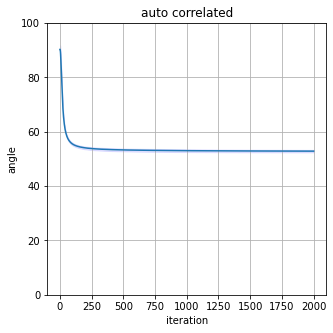

In [8]:
## plot the result of auto correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5));
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0));
ax.set_ylim([0, 100]);
ax.set_title('auto correlated');
ax.set_ylabel('angle');
ax.set_xlabel('iteration');
ax.grid(True);

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);


In [9]:
#### network parameters - open loop 2 layer network - second condition - cross correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta2 = input_layer # cross correlated with inputs of network
error_delta1 = np.matmul(error_delta2, backward_weight_1) 

# updating the network parameters
rep = 10
angles2 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    for j in range (number_of_iterations):
        angles2[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = input_layer
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


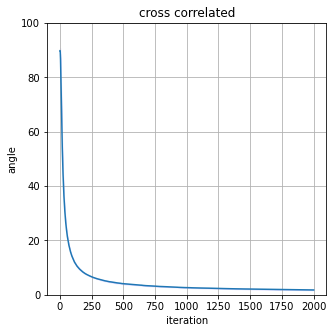

In [10]:
# plot the result of cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0))
ax.set_ylim([0, 100])
ax.set_title('cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='b', alpha=.1);


In [11]:
#### network parameters - open loop 2 layer network - third condition - not auto correlated nor cross correlated

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta2 = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta1 = np.matmul(error_delta2, backward_weight_1)

# updating the network parameters
rep = 10
angles3 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    for j in range (number_of_iterations):
        angles3[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) 
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


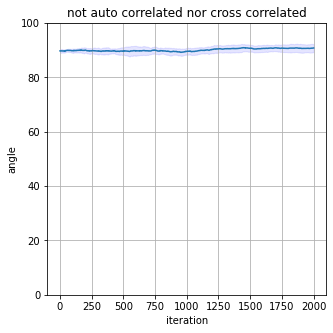

In [12]:
# plot the result of not auto correlated nor cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0))
ax.set_ylim([0, 100])
ax.set_title('not auto correlated nor cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='b', alpha=.1);


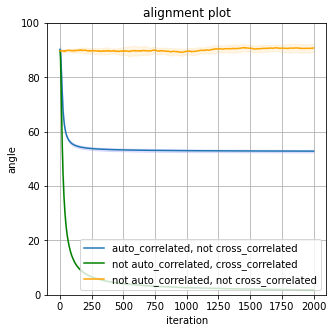

In [13]:
# plot the result of all three conditions together

    
fig, ax = plt.subplots(1,1,figsize=(5,5))

# condition 1
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0))
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence1 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);

# condition 2
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0),color='green')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence2 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='green', alpha=.1);

# condition 3
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0),color='orange')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence3 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='orange', alpha=.1);

ax.legend(['auto_correlated, not cross_correlated','not auto_correlated, cross_correlated',\
           'not auto_correlated, not cross_correlated'],loc='lower right')

In [2]:
# Paper Part - 2.3 Using the provided theoretical tool to investigate FA in the learning process of a practical deep ANN
# train and test a 5 layer network on MNIST
# fact = tanh(ReLU) - 50 neurons in all hidden and output layer - output layer is using 5 hot coding
# images of MNIST should be resized to 15*15 - so we have 225 neurons in input layer 
# inputs should be normalized 
# batch size = 1000, 60 batches available (total numbre of 60K images)
# initialization of forward/ backward weights and biases is done using N(0,0.1)
# loss function is sth like squared error, check page 5 for the details

In [42]:
def n_hot_coder(x,n,hot_labels,output_neuron_num):
    category_num = 10
    if(category_num*n > output_neuron_num):
        print('nhot encoding can`t be done since the condition`s not met')
        return false
    
    output = np.zeros((len(x),output_neuron_num))
    
    output[np.where(x == 0),:] = hot_labels[0,:]
    output[np.where(x == 1),:] = hot_labels[1,:]
    output[np.where(x == 2),:] = hot_labels[2,:]
    output[np.where(x == 3),:] = hot_labels[3,:]
    output[np.where(x == 4),:] = hot_labels[4,:]
    output[np.where(x == 5),:] = hot_labels[5,:]
    output[np.where(x == 6),:] = hot_labels[6,:]
    output[np.where(x == 7),:] = hot_labels[7,:]
    output[np.where(x == 8),:] = hot_labels[8,:]
    output[np.where(x == 9),:] = hot_labels[9,:]

    return output

In [43]:
def loss_function(output_layer,labels):
    difference = labels-output_layer
    output = 0.5*(np.sum(difference**2))
    return output

In [44]:
def tanh_Relu_deriv(x):
    non_negs = np.where(x > 0)
    output = np.zeros(x.shape)
    output[non_negs] = 1-np.tanh(x[non_negs])**2
    return output

In [45]:
def binarize_output(output,n):
    binarized = np.zeros(output.shape)
    n = n # n max values
    for i in range(len(output)):
        sorted_indices = np.argsort(output[i,:])
        binarized[i,sorted_indices[-n:]] = 1
    return binarized

In [46]:
def accuracy_cal(output,label):
    acc = 0
    for i in range(len(output)):
        if(sum(output[i,:] == label[i,:]) == output.shape[1]):
            acc += 1
  
    acc = acc/len(output)*100 # in percentage
    return acc

In [66]:
# Load MNIST Dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('data loaded!')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


data loaded!
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [69]:
# resize images to 15*15
import cv2

x_train_resized = np.zeros((x_train.shape[0],15,15))
x_test_resized = np.zeros((x_test.shape[0],15,15))

# resize train images
for i in range (x_train.shape[0]):
    image = np.squeeze(x_train[i,:,:])
    x_train_resized[i,:,:] = cv2.resize(image,(15,15))

    
# resize test images
for i in range (x_test.shape[0]):
    image = np.squeeze(x_test[i,:,:])
    x_test_resized[i,:,:] = cv2.resize(image,(15,15))
    
print('resizing done!')
print(x_train_resized.shape,x_test_resized.shape)


resizing done!
(60000, 15, 15) (10000, 15, 15)


In [70]:
# vectorize images

x_train_flat = x_train_resized.reshape(x_train_resized.shape[0],-1)
x_test_flat = x_test_resized.reshape(x_test_resized.shape[0],-1)
print('vectorization done!')
print(x_train_flat.shape,x_test_flat.shape)

vectorization done!
(60000, 225) (10000, 225)


In [71]:
# normalize images

x_tr_norm = x_train_flat/255
x_te_norm  = x_test_flat/255

print('normalization done!')

normalization done!


In [171]:
# n hot coding the labels
category_num = 10
output_neuron_num = 10
n = int(output_neuron_num/category_num)

# encoding the categroies
categories_nhot = np.zeros((category_num,output_neuron_num))
codes = random.sample(range(output_neuron_num), output_neuron_num)
for i in range(category_num):
    categories_nhot[i,codes[i*n:(i+1)*n]] = 1 
    
y_train_nhot = n_hot_coder(y_train,n,categories_nhot,output_neuron_num)
y_test_nhot = n_hot_coder(y_test,n,categories_nhot,output_neuron_num)

    
print('n hot coding done!')
print(y_train_nhot.shape, y_test_nhot.shape)

n hot coding done!
(60000, 10) (10000, 10)


In [246]:
# create the network weights and biases from N(0,0.1)
mu = 0
sigma = 0.1

# each layer size
input_layer_size = 225
hidden_layer1_size = 50
hidden_layer2_size = 50
hidden_layer3_size = 50
hidden_layer4_size = 50
output_layer_size = 10

# forward weights
w0 = np.random.normal(mu,sigma,size=(input_layer_size,hidden_layer1_size))
w1 = np.random.normal(mu,sigma,size=(hidden_layer1_size,hidden_layer2_size))
w2 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer3_size))
w3 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer4_size))
w4 = np.random.normal(mu,sigma,size=(hidden_layer4_size,output_layer_size))

# backward weights
B4 = np.random.normal(mu,sigma,size=(output_layer_size,hidden_layer4_size))
B3 = np.random.normal(mu,sigma,size=(hidden_layer4_size,hidden_layer3_size))
B2 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer2_size))
B1 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer1_size))

# bias vectors
b1 =  np.random.normal(mu,sigma,hidden_layer1_size)
b2 =  np.random.normal(mu,sigma,hidden_layer2_size)
b3 =  np.random.normal(mu,sigma,hidden_layer3_size)
b4 =  np.random.normal(mu,sigma,hidden_layer4_size)
b5 =  np.random.normal(mu,sigma,output_layer_size)

print('network parameters created!')

network parameters created!


In [247]:
import pandas as pd

# run the network - run prev part to initialize the paramters each time

LR = 0.0009
batch_size = 1000
batch_num = 60
im_size = 15*15
input_layer = x_tr_norm.reshape((batch_num,batch_size,im_size))
iterations_num = 200
accuracy_training = np.zeros((batch_num,iterations_num))
loss_training = np.zeros((batch_num,iterations_num))

# angle between B & W
alignment = np.zeros((4,batch_num,iterations_num))


for j in range(iterations_num):
    for i in range(batch_num):
        # forward
        z1 = np.matmul(input_layer[i,:,:],w0) + b1
        hidden_layer1 = np.tanh(ReLU(z1))
        z2 = np.matmul(hidden_layer1,w1) + b2
        hidden_layer2 = np.tanh(ReLU(z2))
        z3 = np.matmul(hidden_layer2,w2) + b3
        hidden_layer3 = np.tanh(ReLU(z3))
        z4 = np.matmul(hidden_layer3,w3) + b4
        hidden_layer4 = np.tanh(ReLU(z4))
        z5 = np.matmul(hidden_layer4,w4) + b5
        output_layer = np.tanh(ReLU(z5))
        
        # backward the error
        E = y_train_nhot[i*batch_size:(i+1)*batch_size,:]-output_layer
        delta5 = np.multiply(E,tanh_Relu_deriv(z5))
        delta4 = np.multiply(np.matmul(delta5,B4),tanh_Relu_deriv(z4))
        delta3 = np.multiply(np.matmul(delta4,B3),tanh_Relu_deriv(z3))
        delta2 = np.multiply(np.matmul(delta3,B2),tanh_Relu_deriv(z2))
        delta1 = np.multiply(np.matmul(delta2,B1),tanh_Relu_deriv(z1))
        
        # update forward weights 
        w4 += LR*np.matmul(hidden_layer4.T,delta5)
        w3 += LR*np.matmul(hidden_layer3.T,delta4)
        w2 += LR*np.matmul(hidden_layer2.T,delta3)
        w1 += LR*np.matmul(hidden_layer1.T,delta2)
        w0 += LR*np.matmul(input_layer[i,:,:].T,delta1)
        
        # update biases
        J = np.ones((1,batch_size))
        b5 += np.squeeze(LR*np.matmul(J,delta5))
        b4 += np.squeeze(LR*np.matmul(J,delta4))
        b3 += np.squeeze(LR*np.matmul(J,delta3))
        b2 += np.squeeze(LR*np.matmul(J,delta2))
        b1 += np.squeeze(LR*np.matmul(J,delta1))
        
        # binarize output
        n = 1
        output_layer_binarized = binarize_output(output_layer,n)

        # loss values
        loss_training[i,j] = loss_function(output_layer_binarized,y_train_nhot[i*batch_size:(i+1)*batch_size,:])
        accuracy_training[i,j] = accuracy_cal(output_layer_binarized,y_train_nhot[i*batch_size:(i+1)*batch_size,:]);
        
        # cal the angle between B & W
        alignment[0,i,j] = angleCal(w1,B1.T)
        alignment[1,i,j] = angleCal(w2,B2.T) 
        alignment[2,i,j] = angleCal(w3,B3.T) 
        alignment[3,i,j] = angleCal(w4,B4.T) 
    
    print(np.mean(accuracy_training[:,j]),np.mean(loss_training[:,j]))

print('network training done!')

22.59666666666667 774.0333333333333
38.673333333333325 613.2666666666667
53.40666666666667 465.93333333333334
63.258333333333326 367.4166666666667
72.03 279.7
77.72666666666666 222.73333333333332
80.32333333333334 196.76666666666668
81.635 183.65
82.485 175.15
83.12666666666668 168.73333333333332
83.62333333333335 163.76666666666668
84.06833333333334 159.31666666666666
84.465 155.35
84.87000000000002 151.3
85.195 148.05
85.50499999999998 144.95
85.76666666666667 142.33333333333334
86.055 139.45
86.27166666666668 137.28333333333333
86.46000000000001 135.4
86.69833333333332 133.01666666666668
86.86999999999999 131.3
87.04833333333335 129.51666666666668
87.23166666666667 127.68333333333334
87.43333333333332 125.66666666666667
87.57833333333333 124.21666666666667
87.71999999999998 122.8
87.885 121.15
88.03500000000001 119.65
88.17833333333333 118.21666666666667
88.32333333333332 116.76666666666667
88.43333333333334 115.66666666666667
88.55166666666666 114.48333333333333
88.68499999999999 1

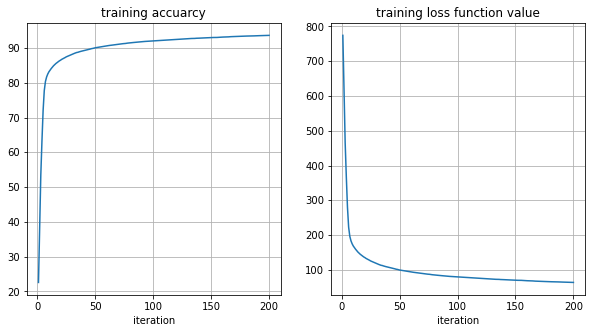

In [248]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(1,iterations_num+1),np.mean(accuracy_training,axis=0))
ax[1].plot(np.arange(1,iterations_num+1),np.mean(loss_training,axis=0))
ax[0].set_title('training accuarcy')
ax[0].set_xlabel('iteration')
ax[1].set_title('training loss function value')
ax[1].set_xlabel('iteration')
ax[0].grid(True)
ax[1].grid(True)

In [249]:
import pandas as pd

# accuracy on test data

batch_size = 1
batch_num = int(x_te_norm.shape[0]/batch_size)
im_size = 15*15
input_layer = x_te_norm.reshape((batch_num,batch_size,im_size))
accuracy_training = np.zeros((batch_num))
loss_training = np.zeros((batch_num))

for i in range(batch_num):
    # forward
    z1 = np.matmul(input_layer[i,:,:],w0) + b1
    hidden_layer1 = np.tanh(ReLU(z1))
    z2 = np.matmul(hidden_layer1,w1) + b2
    hidden_layer2 = np.tanh(ReLU(z2))
    z3 = np.matmul(hidden_layer2,w2) + b3
    hidden_layer3 = np.tanh(ReLU(z3))
    z4 = np.matmul(hidden_layer3,w3) + b4
    hidden_layer4 = np.tanh(ReLU(z4))
    z5 = np.matmul(hidden_layer4,w4) + b5
    output_layer = np.tanh(ReLU(z5))

    # binarize output
    n = 1
    output_layer_binarized = binarize_output(output_layer,n)
    
    # loss val and accuracy
    loss_training[i] = loss_function(output_layer_binarized,y_test_nhot[i*batch_size:(i+1)*batch_size,:])
    accuracy_training[i] = accuracy_cal(output_layer_binarized,y_test_nhot[i*batch_size:(i+1)*batch_size,:]);

print('accuracy: ',np.mean(accuracy_training),' | loss value: ', np.mean(loss_training))
print('done!')

accuracy:  93.31  | loss value:  0.0669
done!


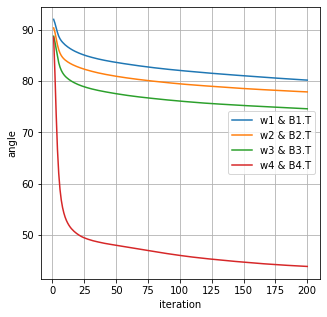

In [252]:
# angle between backward weights and forward weights
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[0,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[1,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[2,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[3,:,:],axis=0))


ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.legend(['w1 & B1.T','w2 & B2.T','w3 & B3.T','w4 & B4.T'],loc='best')
ax.grid(True)